<a href="https://colab.research.google.com/github/Dani-jardim/python_pretalab/blob/main/Daniela_Jardim_Projeto4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 4: Estatística com Python - Probabilidade, Amostragem e Testes de Hipóteses

## Objetivo do Projeto:

O objetivo deste projeto é aplicar os conceitos aprendidos sobre Estatística Descritiva, Probabilidade, Amostragem e Testes de Hipóteses.

O projeto irá avaliar a compreensão dos tópicos abordados e como conseguem aplicar as ferramentas estatísticas para realizar uma análise real usando dados.

## Cenário:

A base de dados para esse projeto será a "Telco Customer Churn",disponível no Kaggle,  que contém dados sobre a rotatividade de clientes de uma empresa de telecomunicações.

A análise desse dataset é interessante, pois permite explorar a jornada do cliente, entender o comportamento daqueles que deixam a empresa e realizar testes de hipóteses para identificar os fatores que influenciam essa decisão.

link do dataset -[ Telco Customer Churn](
  https://www.kaggle.com/datasets/alfathterry/telco-customer-churn-11-1-3)

### Conceitos Básicos de Estatística em Python - Estatística Descritiva

Nesta primeira etapa, você irá realizar uma análise descritiva dos dados. Escolha algumas colunas que representam variáveis importantes para o negócio *(por exemplo, churn, tenure, monthly charges)* e responda às seguintes perguntas:

***Distribuição dos dados:***

1. Qual é a média, mediana, moda e desvio padrão do tempo de permanência (tenure) dos clientes?

***Análise de dispersão:***

2. Quais são os quartis e percentis do valor das cobranças mensais (monthly charges) e das taxas de rescisão (churn)?


***Visualização:***

3. Utilize gráficos como histograma e boxplot para visualizar a distribuição dos dados.

### Probabilidade, Amostragem e Testes de Hipóteses

Agora que você já realizou uma análise descritiva, vamos nos aprofundar em probabilidade, amostragem e testes de hipóteses.

***Amostragem:***

1. Escolha uma amostra aleatória de 30% dos dados.

Tipos de Amostragem: Utilize amostragem aleatória simples e estratificada para escolher as amostras, explicando as diferenças entre elas.

***Probabilidade:***

2. Calcule a probabilidade de um cliente encerrar o serviço (churn) com base em características como tempo de permanência (tenure) e cobranças mensais (monthly charges).

***Testes de Hipóteses:***

1. Escolha duas variáveis relevantes (por exemplo, churn e tipo de contrato) e formule uma hipótese nula (H0) e uma hipótese alternativa (H1).

2. Realize um Teste T ou ANOVA para verificar se há diferença significativa nas cobranças mensais entre clientes que cancelam o serviço e aqueles que não cancelam.

3. Analise o valor-p e interprete os resultados.

## O que entregar:

1. Um notebook com a análise completa.

2. A análise descritiva dos dados.

3. A aplicação da amostragem e cálculo de probabilidade.

4. O resultado dos testes de hipóteses com a interpretação crítica.

#Montando o google Drive

In [ ]:
#Montando o google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/pretaLab/projeto04

/content/drive/MyDrive/pretaLab/projeto04


In [ ]:
import os
print(os.getcwd())

/content/drive/MyDrive/pretaLab/projeto04


In [ ]:
!ls

Daniela_Jardim_Projeto4.ipynb


#Iniciando o projeto

In [ ]:
#importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
#Importar a base de dados "Telco Customer Churn" disponível no Kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alfathterry/telco-customer-churn-11-1-3")

print("Path to dataset files:", path)

100%|██████████| 513k/513k [00:00<00:00, 73.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/alfathterry/telco-customer-churn-11-1-3/versions/1


In [ ]:
/root/.cache/kagglehub/datasets/alfathterry/telco-customer-churn-11-1-3/versions/1

SyntaxError: invalid syntax (<ipython-input-27-cabd1da9292d>, line 1)

In [ ]:
#Carregar os dados
dados = pd.read_csv('/root/.cache/kagglehub/datasets/alfathterry/telco-customer-churn-11-1-3/versions/1/telco.csv')

In [ ]:
# Visualizar os primeiros registros
dados.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [ ]:
#Consultar a estrutura das tabelas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Under 30                           7043 non-null   object 
 3   Senior Citizen                     7043 non-null   object 
 4   Married                            7043 non-null   object 
 5   Dependents                         7043 non-null   object 
 6   Number of Dependents               7043 non-null   int64  
 7   Country                            7043 non-null   object 
 8   State                              7043 non-null   object 
 9   City                               7043 non-null   object 
 10  Zip Code                           7043 non-null   int64  
 11  Latitude                           7043 non-null   float

In [ ]:
print(dados.columns)

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')


#Limpeza dos Dados

In [ ]:
# Verificar se há valores ausentes
dados.isnull().sum()

,0
Gender,0
Age,0
Under 30,0
Senior Citizen,0
Married,0
Dependents,0
Number of Dependents,0
Country,0
State,0
City,0


In [ ]:
# Verificar valores duplicados
dados.duplicated().sum()

0

In [ ]:
# Remover valores duplicados, se existirem
dados.drop_duplicates(inplace=True)

In [ ]:
# Resumo estatístico dos dados
dados.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


# Distribuição dos dados:

In [ ]:
# Qual é a média, mediana, moda e desvio padrão do tempo de permanência (tenure = Quanto tempo o cliente permaneceu na empresa) dos clientes?

#Selecionar coluna tenure in months
tenure = dados['Tenure in Months']

#Saber qual a media de Tenure in Months
tenure_mean = tenure.mean()
print("Média de Tenure in Months:", tenure_mean)

#Saber qual a mediana de Tenure in Months
tenure_median = tenure.median()
print("Mediana de Tenure in Months:", tenure_median)

#Saber qual a moda de Tenure in Months
tenure_mode = tenure.mode()
print("Moda de Tenure in Months:", tenure_mode)

#Saber qual o desvio padrão do tempo de permanência dos clientes
tenure_std = tenure.std()
print("Desvio padrão de Tenure in Months:", tenure_std)

Média de Tenure in Months: 32.38676700269772
Mediana de Tenure in Months: 29.0
Moda de Tenure in Months: 0    1
Name: Tenure in Months, dtype: int64
Desvio padrão de Tenure in Months: 24.542061011425577


# Análise de dispersão:


**Quartis:**

In [ ]:
# Quais são os quartis do valor das cobranças mensais (monthly charges) e das taxas de rescisão (churn)?

#Saber quais são os quartis do valor das cobranças mensais (monthly charges)
monthly_charges_quantiles = tenure.quantile([0.25, 0.5, 0.75])
print("Quantis do valor das cobranças mensais (monthly charges):\n", monthly_charges_quantiles)

#Saber quais são os quartis do valor das taxas de rescisão mensais (churn)
churn_quantiles = tenure.quantile([0.25, 0.5, 0.75])
print("Quantis do valor das taxas de rescisão mensais (churn):\n", churn_quantiles)


Quantis do valor das cobranças mensais (monthly charges):
 0.25     9.0
0.50    29.0
0.75    55.0
Name: Tenure in Months, dtype: float64
Quantis do valor das taxas de rescisão mensais (churn):
 0.25     9.0
0.50    29.0
0.75    55.0
Name: Tenure in Months, dtype: float64


**Percentis:**

In [ ]:
#Saber quais são os percentis do valor das cobranças mensais (monthly charges)
monthly_charges_quantiles_percentil = tenure.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
print("Percentis do valor das cobranças mensais (monthly charges):\n", monthly_charges_quantiles_percentil)

#Saber quais são os percentis do valor das taxas de rescisão mensais (Churn Reason)
churn_quantiles_percentil = tenure.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
print("Percentis do valor das taxas de rescisão mensais (churn):\n", churn_quantiles_percentil)

Percentis do valor das cobranças mensais (monthly charges):
 0.1     2.0
0.2     6.0
0.3    12.0
0.4    20.0
0.5    29.0
0.6    40.0
0.7    50.0
0.8    60.0
0.9    69.0
Name: Tenure in Months, dtype: float64
Percentis do valor das taxas de rescisão mensais (churn):
 0.1     2.0
0.2     6.0
0.3    12.0
0.4    20.0
0.5    29.0
0.6    40.0
0.7    50.0
0.8    60.0
0.9    69.0
Name: Tenure in Months, dtype: float64


# Visualização

Utilize gráficos como histograma e boxplot para visualizar a distribuição dos dados.

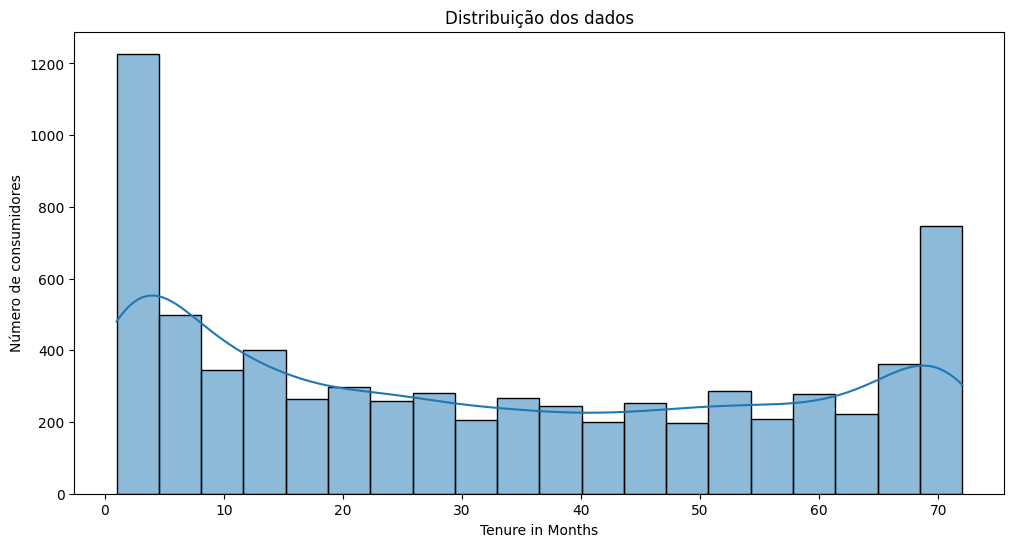

In [ ]:
# Gerar um gráficos como histograma e boxplot para visualizar a distribuição dos dados
plt.figure(figsize=(12, 6))
sns.histplot(tenure, bins=20, kde=True)
plt.title('Distribuição dos dados')
plt.xlabel('Tenure in Months')
plt.ylabel('Número de consumidores')
plt.show()

In [ ]:
print(dados.columns)

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')


In [ ]:
# drop customerID -> identifier
dados.drop(['Customer ID'], axis=1, inplace=True)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Under 30                           7043 non-null   object 
 3   Senior Citizen                     7043 non-null   object 
 4   Married                            7043 non-null   object 
 5   Dependents                         7043 non-null   object 
 6   Number of Dependents               7043 non-null   int64  
 7   Country                            7043 non-null   object 
 8   State                              7043 non-null   object 
 9   City                               7043 non-null   object 
 10  Zip Code                           7043 non-null   int64  
 11  Latitude                           7043 non-null   float

# Probabilidade, Amostragem e Testes de Hipóteses

In [ ]:
#Escolha uma amostra aleatória de 30% dos dados
amostra = dados.sample(frac=0.3, random_state=42)

# Probabilidade


In [ ]:
# Calcular a probabilidade de um cliente encerrar o serviço (churn) com base em características como tempo de permanência (tenure) e cobranças mensais (monthly charges).

#Saber a probabilidade de um cliente encerrar o serviço (churn)
probabilidade_churn = dados['Churn Label'].value_counts(normalize=True)
print("Probabilidade de um cliente encerrar o serviço (churn):\n", probabilidade_churn)


Probabilidade de um cliente encerrar o serviço (churn):
 Churn Label
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [ ]:
dados['Churn Label'].value_counts()

,count
Churn Label,
No,5174
Yes,1869


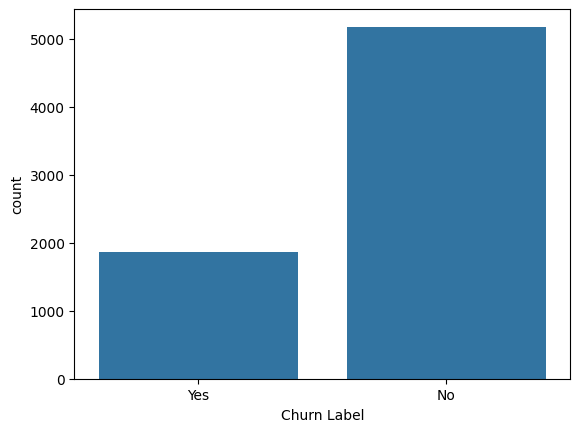

In [ ]:
# Churn
sns.countplot(x='Churn Label', data=dados);

In [ ]:
# Saber quantos clientes que desistem e não desistem por gênero.

#Saber a porcentagem por genero
df_Gender = pd.DataFrame(dados['Gender'].value_counts())
df_Gender['Percent'] = [round(i*100/sum(df_Gender['count']), 1) for i in df_Gender['count']]

df_Gender_churn = pd.DataFrame(dados.Gender[(dados['Churn Label'] == 'Yes')].value_counts())
df_Gender['Churn Label'] = df_Gender_churn['count'].reindex(df_Gender.index).fillna(0).astype(int)
df_Gender['Churn Label %'] = [round(i*100/sum(df_Gender_churn['count']), 1) for i in df_Gender_churn['count']]

df_Gender_not_churn = pd.DataFrame(dados.Gender[(dados['Churn Label'] == 'No')].value_counts())
df_Gender['Not Churn'] = df_Gender_not_churn['count'].reindex(df_Gender.index).fillna(0).astype(int)
df_Gender['Not Churn %'] = [round(i*100/sum(df_Gender_not_churn['count']), 1) for i in df_Gender_not_churn['count']]

print(df_Gender)


        count  Percent  Churn Label  Churn Label %  Not Churn  Not Churn %
Gender                                                                    
Male     3555     50.5          930           50.2       2625         50.7
Female   3488     49.5          939           49.8       2549         49.3


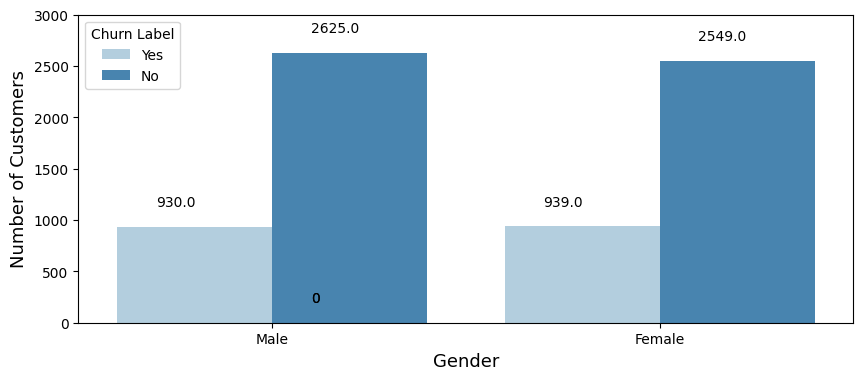

In [ ]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='Gender', hue='Churn Label', data=dados, palette='Blues')
plt.xlabel('Gender', fontsize=13)
plt.ylabel('Number of Customers', fontsize=13)
plt.ylim(0, 3000)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize=10)



#Testes de Hipóteses:



In [ ]:
# Escolha duas variáveis relevantes (por exemplo, churn e tipo de contrato) e formule uma hipótese nula (H0) e uma hipótese alternativa (H1).

#Separar grupos
stats.ttest_ind(dados[dados['Churn Label'] == 'Yes']['Tenure in Months'], dados[dados['Churn Label'] == 'No']['Tenure in Months'])

# Teste T de duas amostras
t_stat, p_value = stats.ttest_ind(dados[dados['Churn Label'] == 'Yes']['Tenure in Months'], dados[dados['Churn Label'] == 'No']['Tenure in Months'])
print("Valor-p:", p_value)

Valor-p: 1.3292218159000336e-205


In [ ]:
#Interpretaçao

if p_value < 0.05:
    print("Rejeitamos a hipótese nula. Existem diferenças significativas entre os grupos.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências de diferenças significativas entre os grupos.")

Rejeitamos a hipótese nula. Existem diferenças significativas entre os grupos.


In [ ]:
# Realize um Teste T ou ANOVA para verificar se há diferença significativa nas cobranças mensais entre clientes que cancelam o serviço e aqueles que não cancelam.
anova_result = stats.f_oneway(dados[dados['Churn Label'] == 'Yes']['Monthly Charge'], dados[dados['Churn Label'] == 'No']['Monthly Charge'])
print("F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)


F-statistic: 273.4637042077133
P-value: 2.7066456068950115e-60


 # Conclusão

Introdução ao Contexto:

Nosso objetivo com este projeto é aplicar os conceitos de Estatística Descritiva, Probabilidade, Amostragem e Testes de Hipóteses, consolidando o entendimento teórico e demonstrando a capacidade de utilizar ferramentas estatísticas em uma análise prática de dados reais.

A base de dados que utilizaremos é o "Telco Customer Churn", que contém informações sobre a rotatividade de clientes de uma empresa de telecomunicações. A análise desse dataset nos permitirá entender o comportamento dos clientes que cancelam o serviço e identificar os fatores que influenciam essa decisão.

**Distribuição dos dados:**

Quantos clientes abandonam e não abandonam?

No gráfico abaixo, pode-se observar que a maioria dos clientes não cancela
De 7.043 clientes, 5174 não cancelam.

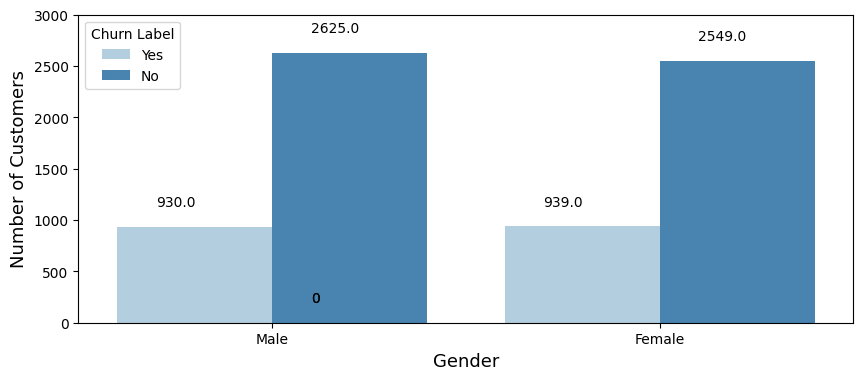